## Observations and Insights 

1. According to the bar charts it shows the Capomulin and Ramicane slows down the tumor in mice more than the other regimens      that's been used to shrink the tumors. 
2. The number of females vs Male are almost equal for the timepoint when testing occurred.
3. Regimen Propriva does not reduce the tumors as much as Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Stelasyn and
   Zoniferol.   

In [234]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [235]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [236]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = merge_df[merge_df.duplicated(keep='last')]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0


In [237]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'].isin(duplicate_mice)==False]

In [238]:
# Checking the number of mice in the clean DataFrame.
print(clean_df["Mouse ID"].count())
print(clean_df["Mouse ID"].nunique())

1880
248


## Summary Statistics

In [239]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_drug = clean_df.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

reg_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
reg_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
reg_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
reg_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
reg_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.


single_summary= pd.DataFrame({'Mean': reg_mean,'Median': reg_median, 'VAR': reg_var, 'STD': reg_std, 'Sem': reg_sem})
single_summary


,Mean,Median,VAR,STD,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [240]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_drug = clean_df.groupby("Drug Regimen")
reg_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
reg_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
reg_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
reg_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
reg_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = regimen_drug.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

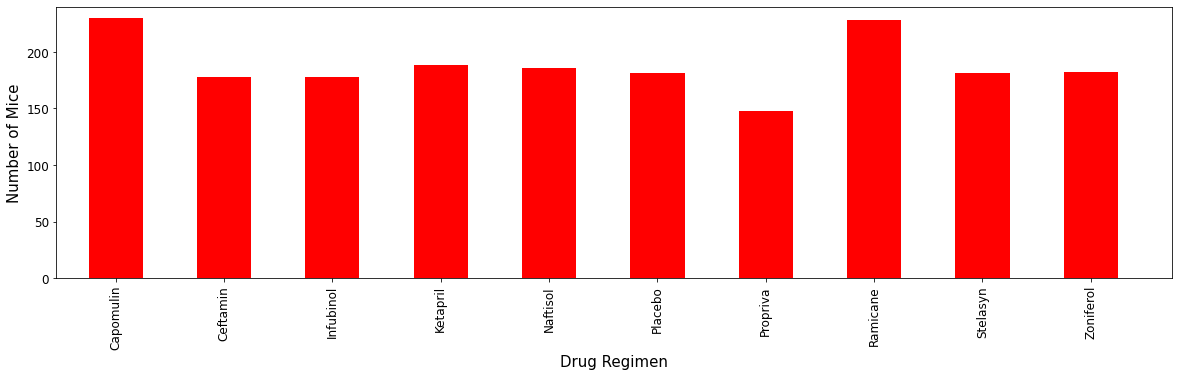

In [241]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoint = clean_df.groupby(["Drug Regimen"]).count()["Timepoint"]
plot = total_timepoint.plot.bar(figsize=(20, 5), color= "red", fontsize = 12)
 
plt.xlabel("Drug Regimen", fontsize= 15)
plt.ylabel("Number of Mice", fontsize =15)
plt.xlim(-0.55, len(x_axis)-0.25)
plt.ylim(0, max(mouse_id)+10)
plt.show()

In [242]:
mouse_id = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 

Text(104.875, 0.5, 'Number of Mice')

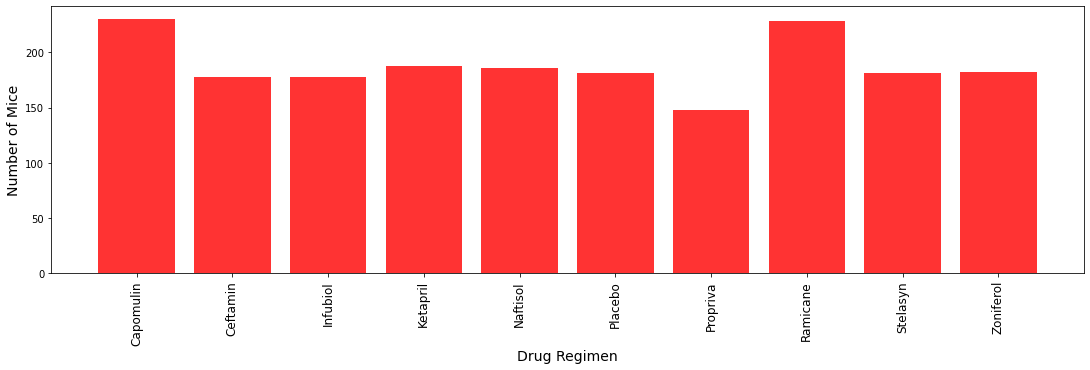

In [243]:
x_ais = np.arange(len(total_timepoint))
fig1, ax1 = plt.subplots(figsize=(15, 5))
plt.bar(x_axis, mouse_id, color='r', alpha=0.80, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubiol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], fontsize = 12, rotation='vertical')
plt.tight_layout()
plt.xlabel("Drug Regimen", fontsize = 14)
plt.ylabel("Number of Mice", fontsize = 14)




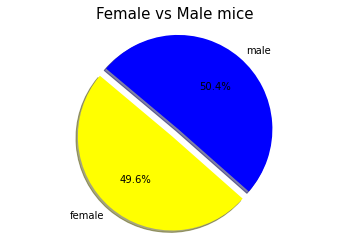

In [244]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mouse = clean_df.groupby("Sex").nunique()
gender = ["female","male"]
female_male = ["123","125"]
colors = ["yellow","blue"]
explode = (0.1, 0)
plt.pie(female_male, explode=explode, colors=colors, labels=gender,  autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Female vs Male mice", fontsize=15)
plt.show()

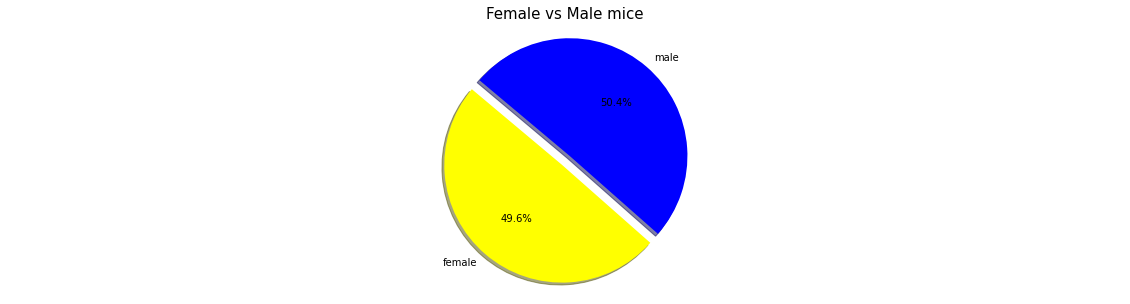

In [245]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# gender_mouse = clean_df.groupby("Sex").nunique()
gender = ["female","male"]
circle = ["49.6","50.4"]
colors = ["yellow","blue"]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(20, 5))
plt.pie(circle, explode=explode, colors=colors, labels=gender,  autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Female vs Male mice", fontsize=15)
plt.show()


## Quartiles, Outliers and Boxplots

In [246]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Capomulin = clean_df.loc[clean_df["Drug Regimen"] =="Capomulin",:]
Capomulin_max = Capomulin.groupby('Mouse ID')['Timepoint'].max()
Capomulin_df = pd.DataFrame(Capomulin_max)
Cap_merge =pd.merge(Capomulin_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
Cap_merge.head()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [247]:
Capomulin_tx = Cap_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tx.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin_tx: {lowerq}")
print(f"The upper quartile of Capomulin_tx: {upperq}")
print(f"The interquartile range of Capomulin_tx: {iqr}")
print(f"The median of Capomulin_tx: {quartiles[0.5]} ")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of Capomulin_tx: 32.37735684
The upper quartile of Capomulin_tx: 40.1592203
The interquartile range of Capomulin_tx: 7.781863460000004
The median of Capomulin_tx: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [248]:
Ramicane = clean_df.loc[clean_df["Drug Regimen"] =="Ramicane",:]
Ramicane_max = Ramicane.groupby('Mouse ID')['Timepoint'].max()
Ramicane_df = pd.DataFrame(Ramicane_max)
Ram_merge =pd.merge(Ramicane_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ram_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [249]:
Ramicane_tx = Ram_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tx.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane_tx: {lowerq}")
print(f"The upper quartile of Ramicane_tx: {upperq}")
print(f"The interquartile range of Ramicane_tx: {iqr}")
print(f"The median of Ramicane_tx: {quartiles[0.5]} ")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ramicane_tx: 31.56046955
The upper quartile of Ramicane_tx: 40.65900627
The interquartile range of Ramicane_tx: 9.098536719999998
The median of Ramicane_tx: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [250]:
Infubinol = clean_df.loc[clean_df["Drug Regimen"] =="Infubinol",:]
Infubinol_max = Infubinol.groupby('Mouse ID')['Timepoint'].max()
Infubinol_df = pd.DataFrame(Infubinol_max)
Inf_merge =pd.merge(Infubinol_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
Inf_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [251]:
Infubinol_tx = Inf_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tx.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol_tx: {lowerq}")
print(f"The upper quartile of Infubinol_tx: {upperq}")
print(f"The interquartile range of Infubinol_tx is: {iqr}")
print(f"The median of Infubinol_tx is: {quartiles[0.5]} ")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Infubinol_tx: 54.04860769
The upper quartile of Infubinol_tx: 65.52574285
The interquartile range of Infubinol_tx is: 11.477135160000003
The median of Infubinol_tx is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [252]:
Ceftamin = clean_df.loc[clean_df["Drug Regimen"] =="Ceftamin",:]
Ceftamin_max = Ceftamin.groupby('Mouse ID')['Timepoint'].max()
Ceftamin_df = pd.DataFrame(Ceftamin_max)
Cef_merge =pd.merge(Ceftamin_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
Cef_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [253]:
Ceftamin_tx = Cef_merge["Tumor Volume (mm3)"]

quartiles =Ceftamin_tx.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ceftamin_tx: {lowerq}")
print(f"The upper quartile of Ceftamin_tx: {upperq}")
print(f"The interquartile range of Ceftamin_tx is: {iqr}")
print(f"The median of Ceftamin_tx is: {quartiles[0.5]} ")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ceftamin_tx: 48.72207785
The upper quartile of Ceftamin_tx: 64.29983003
The interquartile range of Ceftamin_tx is: 15.577752179999997
The median of Ceftamin_tx is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [254]:
# Put treatments into a list for for loop (and later for plot labels)

# Drug_treatments =[Capomulin_tx, Ramicane_tx, Infubinol_tx, Ceftamin_tx]

#  for drug in Drug_treatments
    

# # Create empty list to fill with tumor vol data (for plotting)

# tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    
    # Determine outliers using upper and lower bounds
    

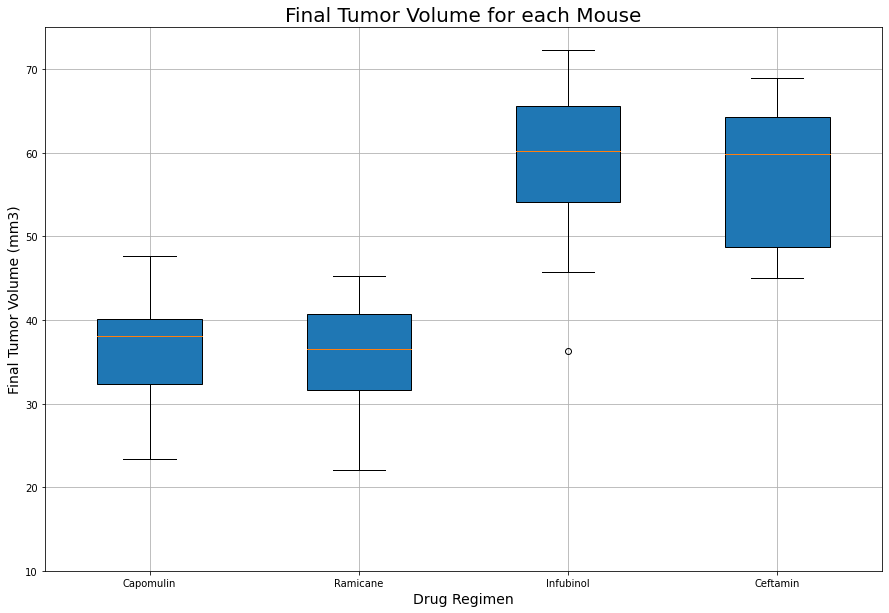

In [255]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Drug_treatments =[Capomulin_tx, Ramicane_tx, Infubinol_tx, Ceftamin_tx]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Final Tumor Volume for each Mouse',fontsize =20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(Drug_treatments, labels= Regimen, widths = 0.5, patch_artist=True,vert=True)
plt.grid()

plt.ylim(10, 75)

plt.show()

## Line and Scatter Plots

In [256]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [257]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [258]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
